In [45]:
import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import pandas as pd

from sbins import *

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [46]:
df = pd.read_csv('LSI_data.csv')

In [47]:
num_values = len(df.index)

data = df.to_numpy()

In [48]:
t = data[:,1] - data[0,1]

In [49]:
print(data[:,1])

[1624640220 1624640250 1624640280 ... 1628853240 1628853270 1628853300]


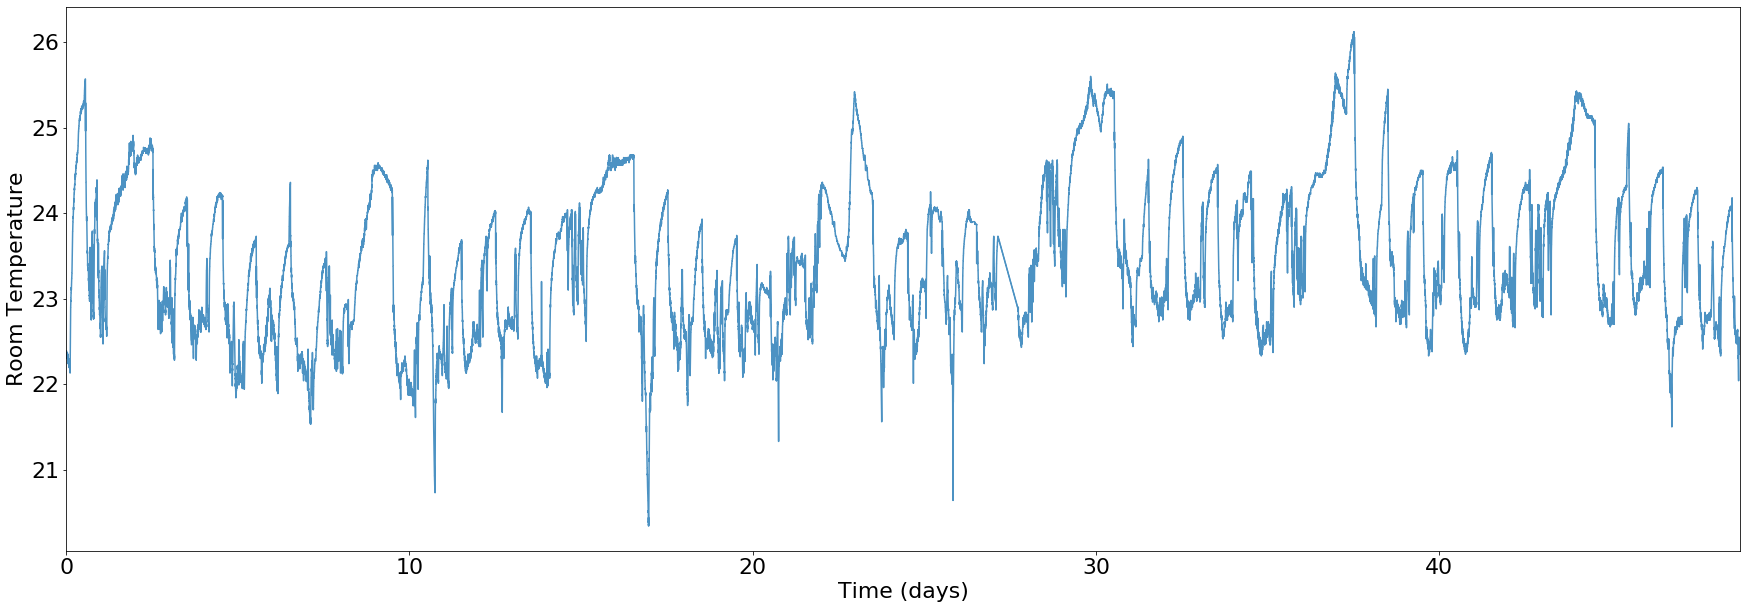

In [51]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(t / (60 * 60 * 24),data[:,3],'-', alpha = 0.8)
ax.set_xlim(0.0, max(t / (60 * 60 * 24)) + 0.01)
ax.set_xlabel("Time (days)")
ax.set_ylabel("Room Temperature")

plt.show()

In [98]:
n = len(t)

dt = t[1] - t[0]

f = data[:,3]

fhat = np.fft.fft(f,n)

PSD = np.real(fhat * np.conj(fhat) / n)
freq = (1 / (dt * n)) * np.arange(n)

L = np.arange(1, np.floor(n/2), dtype = 'int')





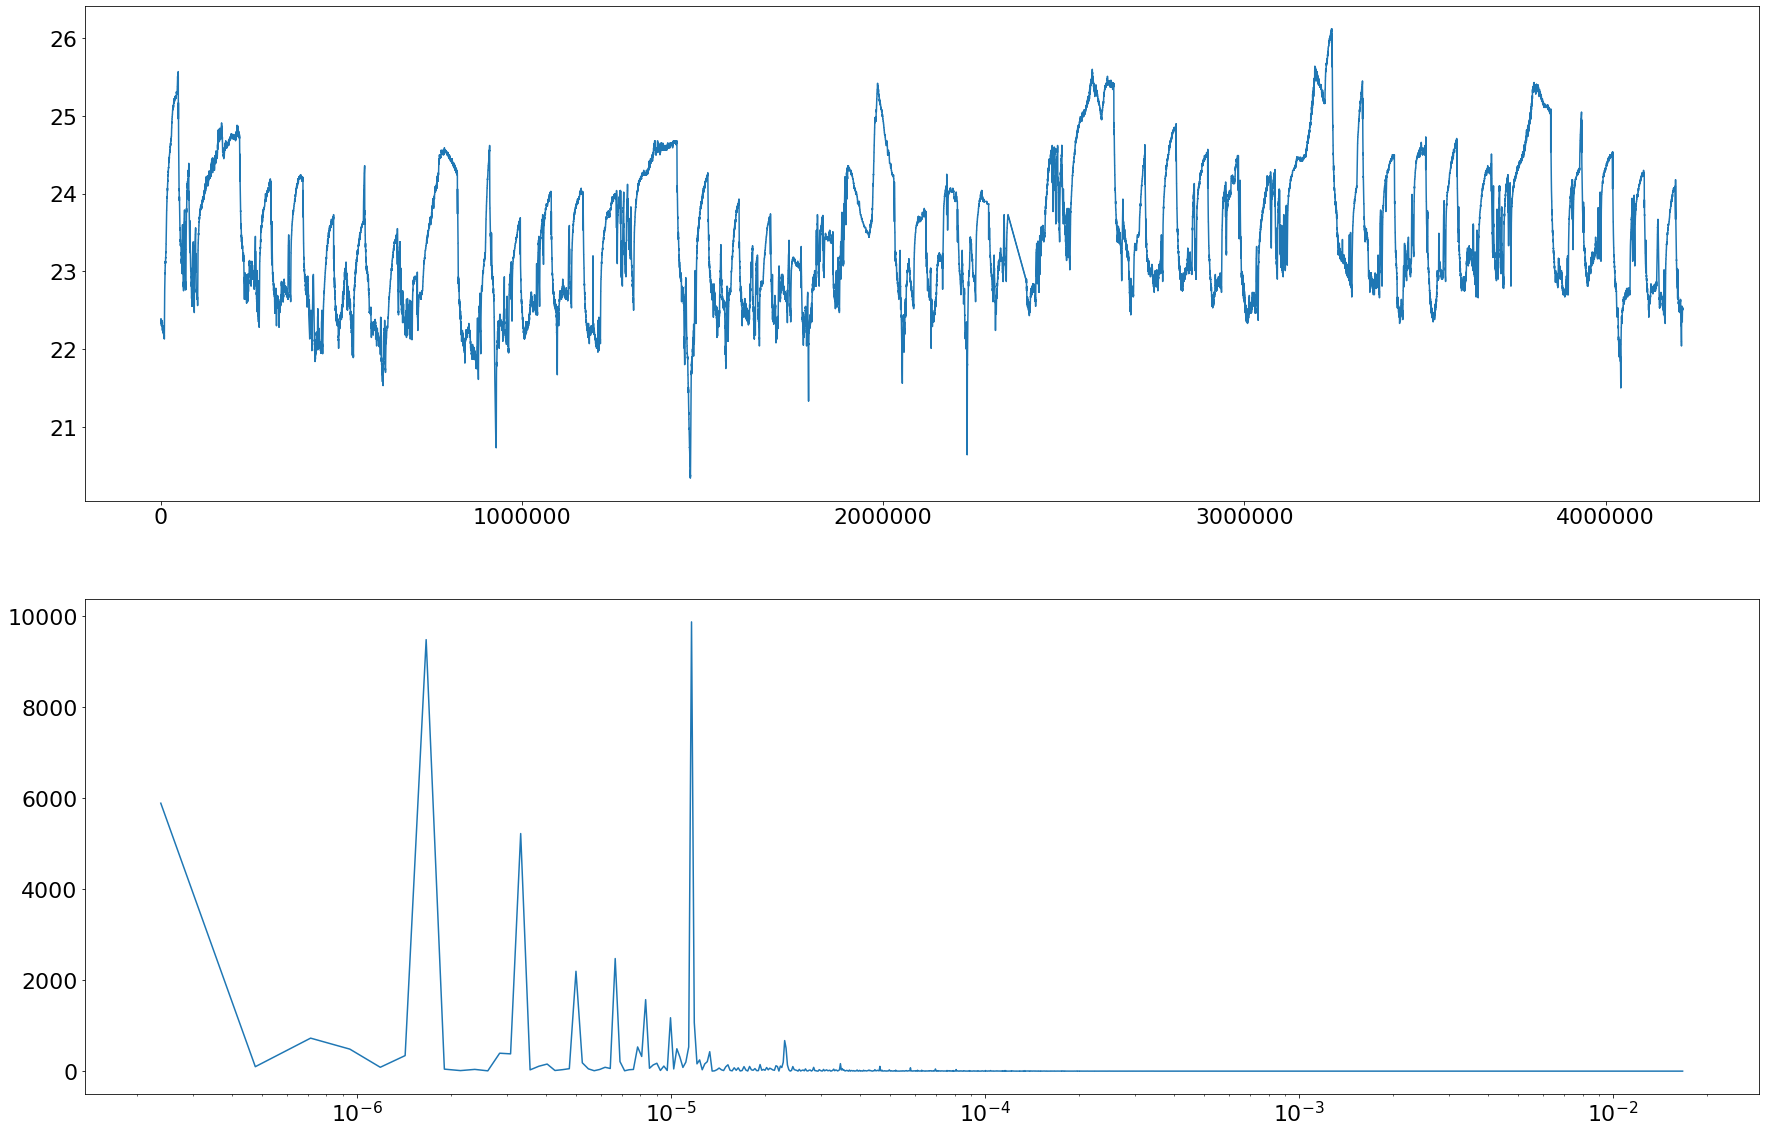

In [100]:
fig, axs = plt.subplots(2,1, figsize=(30,20))

plt.sca(axs[0])
plt.plot(t, f, label = 'noisy')


plt.sca(axs[1])
plt.plot(freq[L],PSD[L])
axs[1].set_xscale('log')

#plt.xlim(np.exp(freq[L[0]]), np.exp(freq[L[-1]]))
#plt.ylim(0.0, np.max(PSD[L]))

## Filtering out noise and Inverse fft

In [111]:
ids = PSD > 20.

PSDclean = PSD * ids

fhat_clean = fhat * ids

ffilt = np.fft.ifft(fhat_clean)


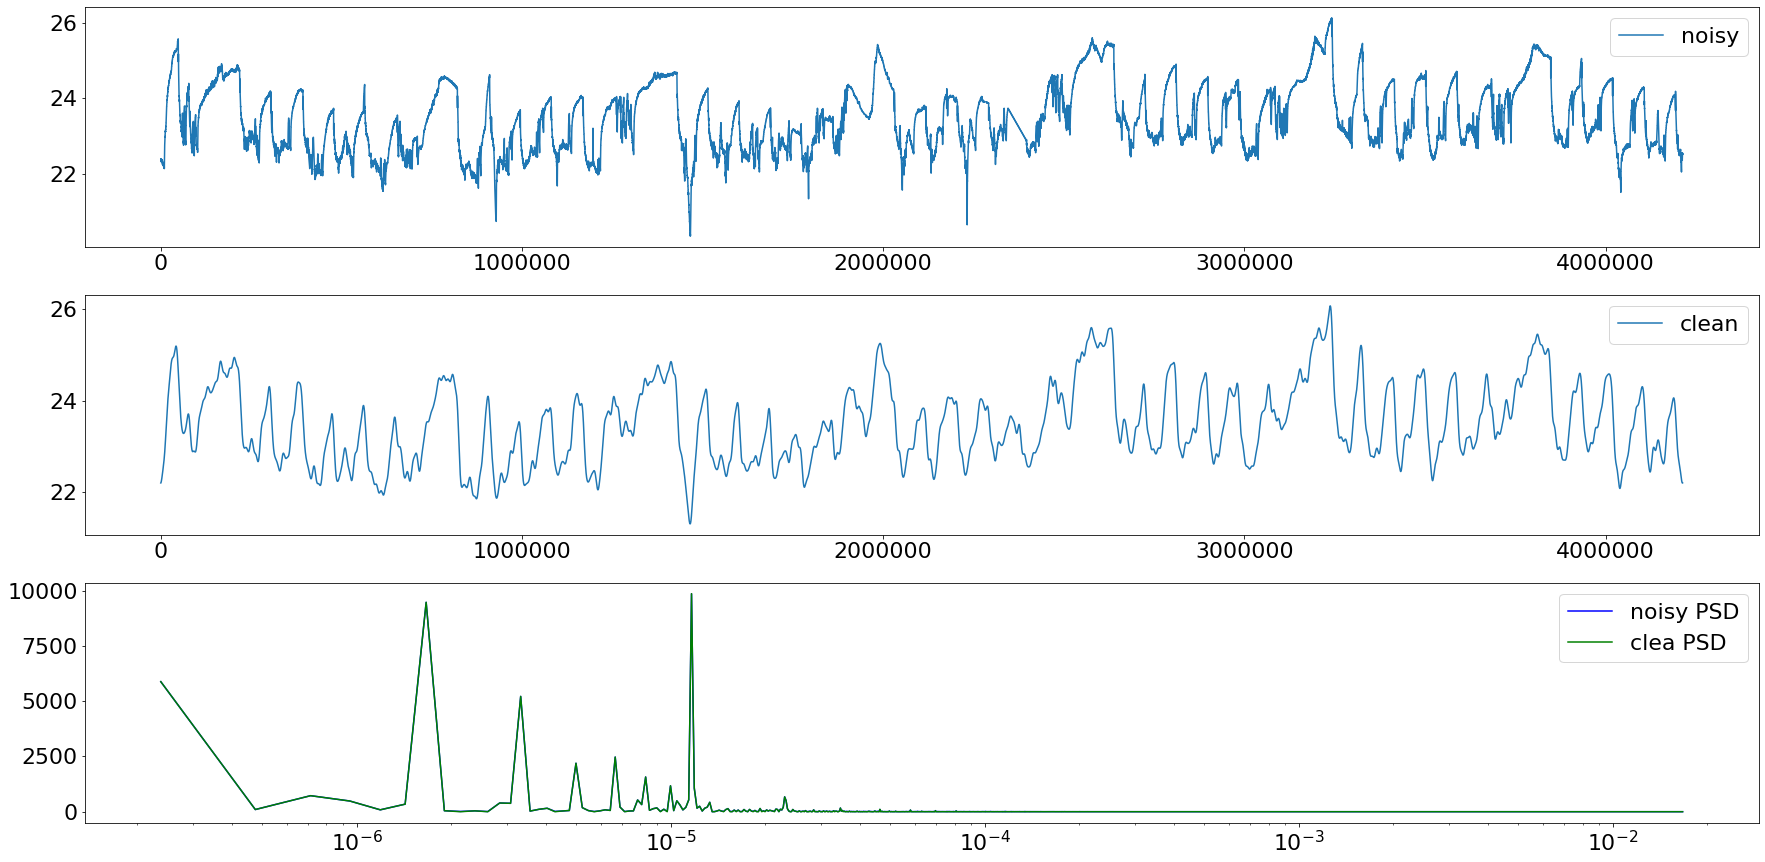

In [115]:
fig, axs = plt.subplots(3,1, figsize=(30,15))

plt.sca(axs[0])
plt.plot(t, f, label = 'noisy')
plt.legend()

plt.sca(axs[1])
plt.plot(t, np.real(ffilt), label = 'clean')
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L], '-b', label ='noisy PSD')
plt.plot(freq[L],PSDclean[L], '-g', label ='clea PSD')
axs[2].set_xscale('log')
plt.legend()

In [113]:
sfd = SmoothedFiniteDifference(smoother_kws={'polyorder': 2, 'window_length': 11})

x = data[:,3]

print(len(t))

x = np.vstack(x)

dXdt = sfd._differentiate(x,t)

140437


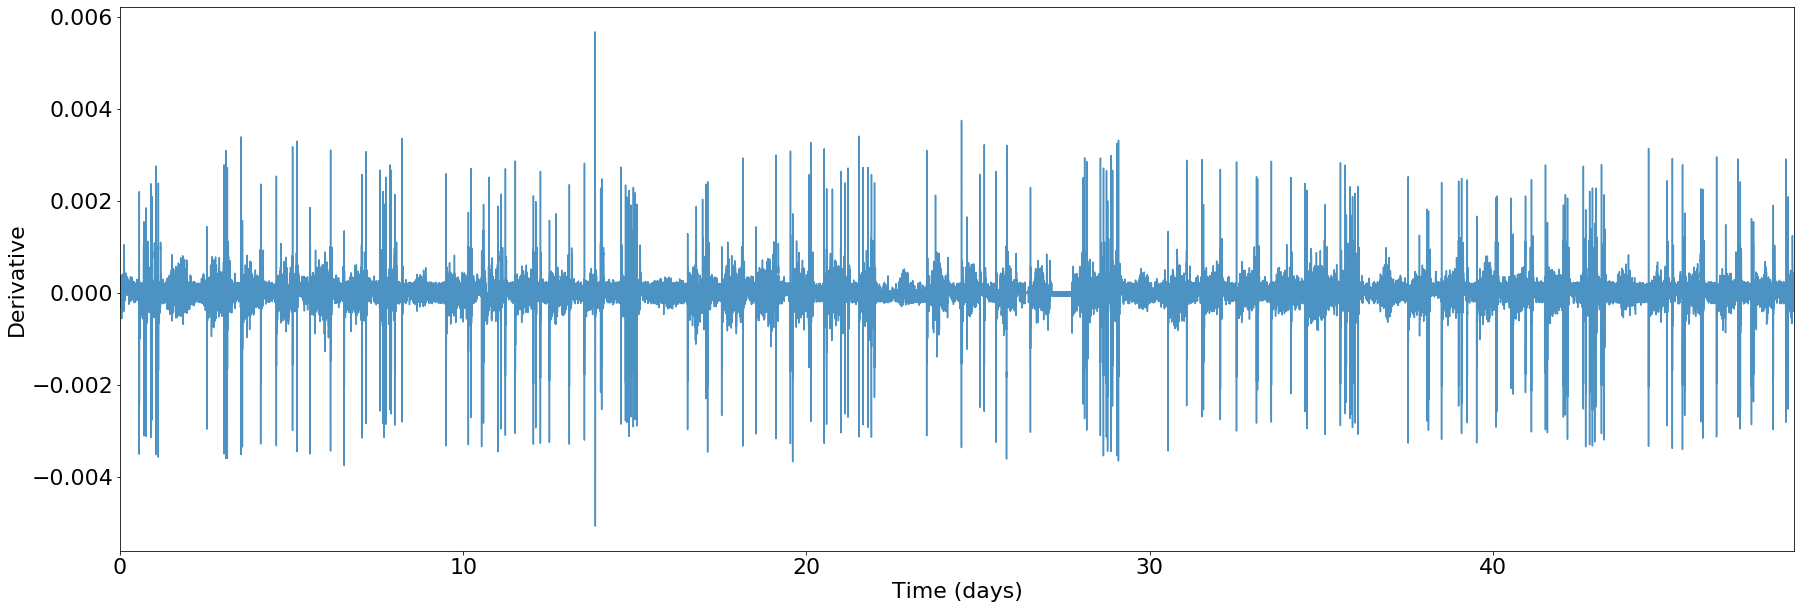

In [77]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(t / (60 * 60 * 24),dXdt,'-', alpha = 0.8)
ax.set_xlim(0.0, max(t / (60 * 60 * 24)) + 0.01)
ax.set_xlabel("Time (days)")
ax.set_ylabel("Derivative")

plt.show()